# Практическое задание к уроку "Обработка изображений и компьютерное зрение"

## Задание
Напишите на Python реализацию как минимум одного алгоритма на выбор: любая на выбор цветовая обработка, перевод в другое цветовое пространство или фильтрация. Изображение выберите самостоятельно.

### Установка библиотек

In [11]:
!pip install imageio
!pip install numpy

### Импорт библиотек

In [8]:
import numpy as np
import imageio
from matplotlib import pyplot as plt

### Читаем изображение в тензор numpy

In [4]:
img = imageio.imread('astronaut.jpeg')

In [6]:
img_bw = img[:, :, 0]

In [7]:
img_bw

Array([[  8,   8,   8, ..., 144, 143, 143],
       [  8,   8,   8, ..., 144, 144, 144],
       [  8,   8,   8, ..., 145, 146, 146],
       ...,
       [  5,   5,   5, ...,  12,  11,  10],
       [  5,   5,   5, ...,  12,  11,  10],
       [  5,   5,   5, ...,  12,  11,  10]], dtype=uint8)

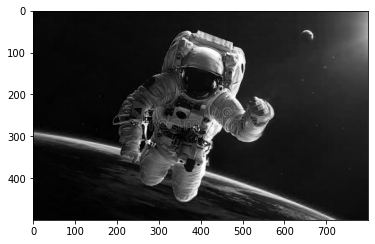

In [12]:
plt.imshow(img_bw, cmap='gray')

In [19]:
def gaussian_blur_filter_window(window_size=12, sigma=3):
  u'''Build blur filter window'''

  # Build the window with passed size argument 
  win_size = (window_size, window_size)

  # Initialize weights with zeros
  window = np.zeros(win_size, dtype=np.float32)

  # Fill window with filter data
  for i in range(window.shape[0]):
    for j in range(window.shape[1]):
      window[i, j] = np.exp(
        -(i - window.shape[0] // 2) ** 2 / sigma**2 / 2 
        -(j - window.shape[1] // 2) ** 2 / sigma**2 / 2
      )

  # Return window in range 0 to 1
  return window / np.sum(window)

In [16]:
def apply_filter(image, window):

  # Making a copy image  
  img = np.copy(image)

  # Initializing the output image with zeros
  out_image = np.zeros(
    (img.shape[0] - window.shape[0] + 1, img.shape[1] - window.shape[1] + 1),
    dtype=np.float32
  )

  # Apply filter
  for i in range(out_image.shape[0]):
    for j in range(out_image.shape[1]):
      x = img[i : i + window.shape[0], j : j + window.shape[1]]
      out_image[i, j] = np.sum(window * x)
  
  return out_image

In [22]:
window = gaussian_blur_filter_window()
out_img = apply_filter(img_bw, window)

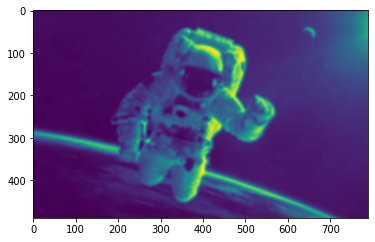

In [23]:
plt.imshow(out_img)